# Car Price Prediction Analysis

### Data Preparation and Initial Exploration
This section includes the initial steps of data preparation, such as downloading the dataset, checking for missing values, and performing basic exploratory data analysis (EDA).

In [ ]:
import os
if not os.path.exists("cars-data/cars_data.csv"):
    import zipfile
    if not os.path.exists("cars-data.zip"):
        # Download the dataset from Kaggle
        # Make sure you have Kaggle API credentials set up in your environment
        os.system("kaggle datasets download -d mohammedadham45/cars-data")

        # Unzip the downloaded dataset
        with zipfile.ZipFile("cars-data.zip", 'r') as zip_ref:
            zip_ref.extractall("cars-data")
    else:
        # If the zip file already exists, just extract it
        print("cars-data.zip already exists. Skipping download.")
        with zipfile.ZipFile("cars-data.zip", 'r') as zip_ref:
            zip_ref.extractall("cars-data")
else:
    print("cars-data/cars_data.csv already exists.")

cars-data/cars_data.csv already exists.


In [257]:
import pandas as pd

df = pd.read_csv("cars-data/cars_data.csv")

df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,I10,2017,7495.0,Manual,11630,Petrol,145,60.1,1.0,hyundi
1,Polo,2017,10989.0,Manual,9200,Petrol,145,58.9,1.0,volkswagen
2,2 Series,2019,27990.0,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW
3,Yeti Outdoor,2017,12495.0,Manual,30960,Diesel,150,62.8,2.0,skoda
4,Fiesta,2017,7999.0,Manual,19353,Petrol,125,54.3,1.2,ford


### EDA
This section includes basic EDA such as checking the shape of the DataFrame, data types, missing values, and descriptive statistics.


In [258]:
# df shape
df.shape

(97712, 10)

In [259]:
# Df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97712 entries, 0 to 97711
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         97712 non-null  object 
 1   year          97712 non-null  int64  
 2   price         96727 non-null  float64
 3   transmission  97712 non-null  object 
 4   mileage       97712 non-null  int64  
 5   fuelType      93586 non-null  object 
 6   tax           97712 non-null  int64  
 7   mpg           94256 non-null  float64
 8   engineSize    97712 non-null  float64
 9   Manufacturer  97712 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 7.5+ MB


In [260]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 model              0
year               0
price            985
transmission       0
mileage            0
fuelType        4126
tax                0
mpg             3456
engineSize         0
Manufacturer       0
dtype: int64


In [261]:
# Df describe
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,97712.000000,96727.000000,97712.000000,97712.000000,94256.000000,97712.000000
mean,2017.066502,16774.299823,23219.475499,120.142408,55.228326,1.664913
std,2.118661,9874.715050,21060.882301,63.357250,16.296400,0.558574
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,9999.000000,7673.000000,125.000000,47.100000,1.200000
50%,2017.000000,14471.000000,17682.500000,145.000000,54.300000,1.600000
75%,2019.000000,20750.000000,32500.000000,145.000000,62.800000,2.000000
max,2024.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


In [262]:
# df dtypes
df.dtypes

model            object
year              int64
price           float64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
Manufacturer     object
dtype: object

In [263]:
# Only taking the numerical columns
df_num = df.select_dtypes(include=['int64', 'float64'])

# Correlation matrix
correlation_matrix = df_num.corr()
correlation_matrix = correlation_matrix.style.background_gradient(cmap='coolwarm')
correlation_matrix
# Visualizing the correlation matrix using seaborn


,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.492507,-0.739664,0.192058,-0.131114,-0.035639
price,0.492507,1.000000,-0.417827,0.307025,-0.293708,0.639612
mileage,-0.739664,-0.417827,1.000000,-0.215558,0.182466,0.107299
tax,0.192058,0.307025,-0.215558,1.000000,-0.449184,0.280770
mpg,-0.131114,-0.293708,0.182466,-0.449184,1.000000,-0.249192
engineSize,-0.035639,0.639612,0.107299,0.280770,-0.249192,1.000000


Column: year
Lower Bound: 2011.5
Upper Bound: 2023.5
Number of Outliers: 1735


Column: price
Lower Bound: -6127.5
Upper Bound: 36876.5
Number of Outliers: 3790


Column: mileage
Lower Bound: -29567.5
Upper Bound: 69740.5
Number of Outliers: 3836


Column: tax
Lower Bound: 95.0
Upper Bound: 175.0
Number of Outliers: 28594


Column: mpg
Lower Bound: 23.550000000000008
Upper Bound: 86.35
Number of Outliers: 910


Column: engineSize
Lower Bound: -2.220446049250313e-16
Upper Bound: 3.2
Number of Outliers: 648




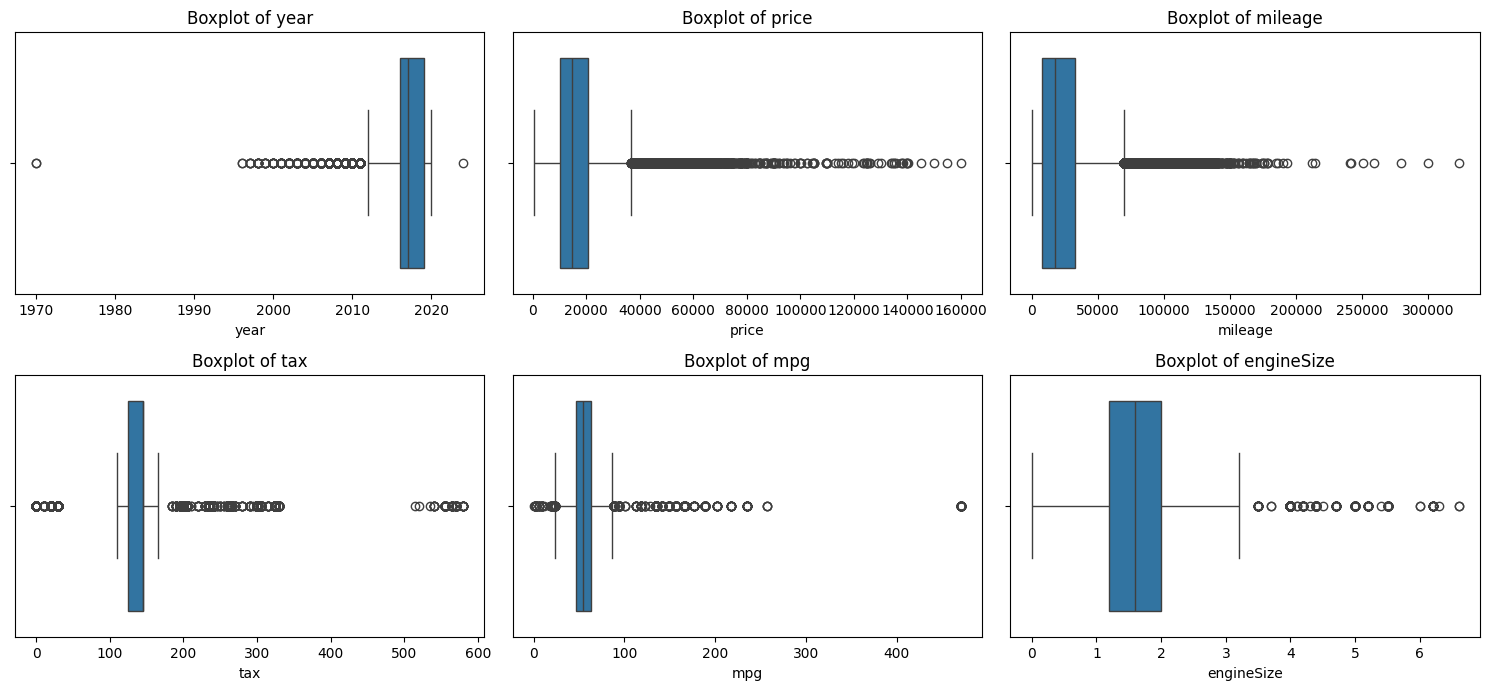

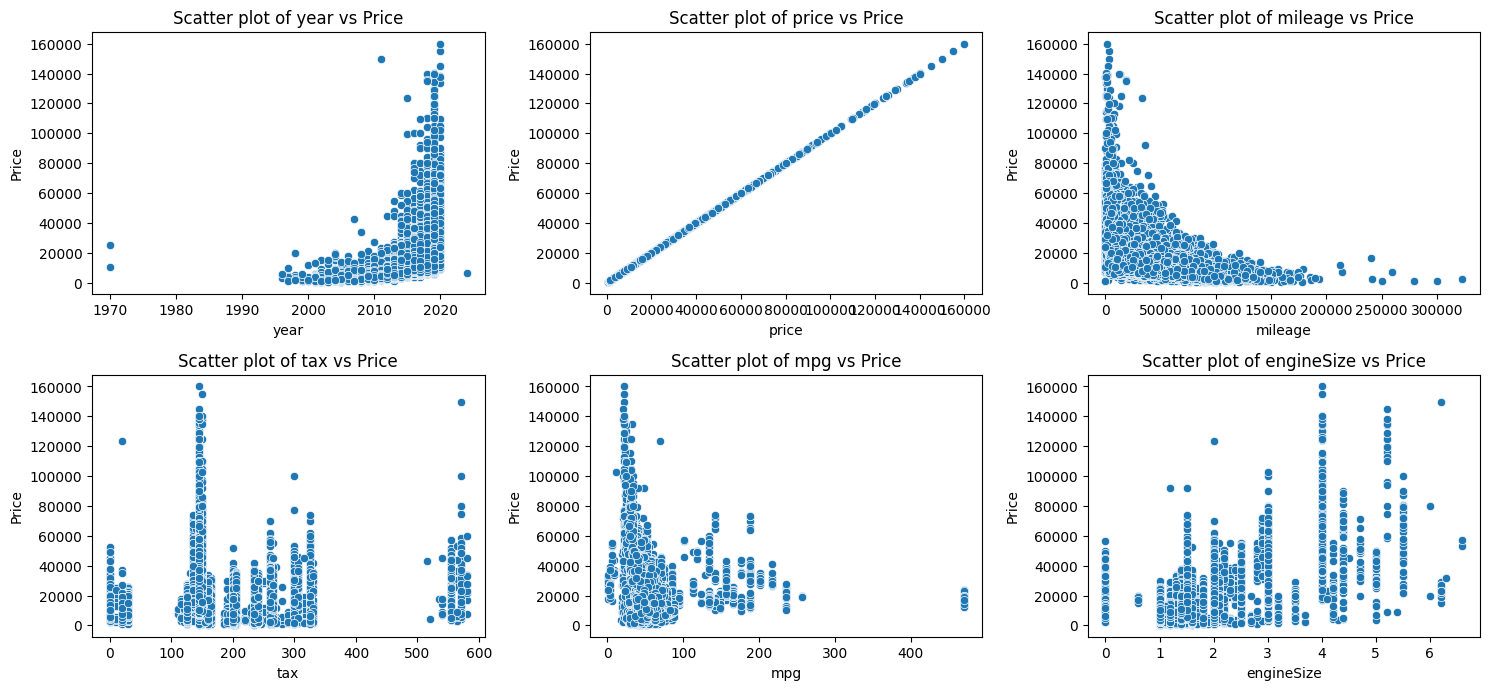

In [264]:
# Detecting outliers using IQR method in key numerical columns
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Function to detect outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# List of numerical columns to check for outliers
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
outliers = {}
for column in numerical_columns:
    lower_bound, upper_bound = detect_outliers_iqr(df, column)
    outliers[column] = {
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'outliers': df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    }
# Print outliers for each numerical column
for column, data in outliers.items():
    print(f"Column: {column}")
    print(f"Lower Bound: {data['lower_bound']}")
    print(f"Upper Bound: {data['upper_bound']}")
    print(f"Number of Outliers: {len(data['outliers'])}")
    print("\n")
# Visualizing outliers using boxplots
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x=column)
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()
# Visualizing outliers using scatter plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=df, x=column, y='price')
    plt.title(f'Scatter plot of {column} vs Price')
    plt.xlabel(column)
    plt.ylabel('Price')
plt.tight_layout()
plt.show()

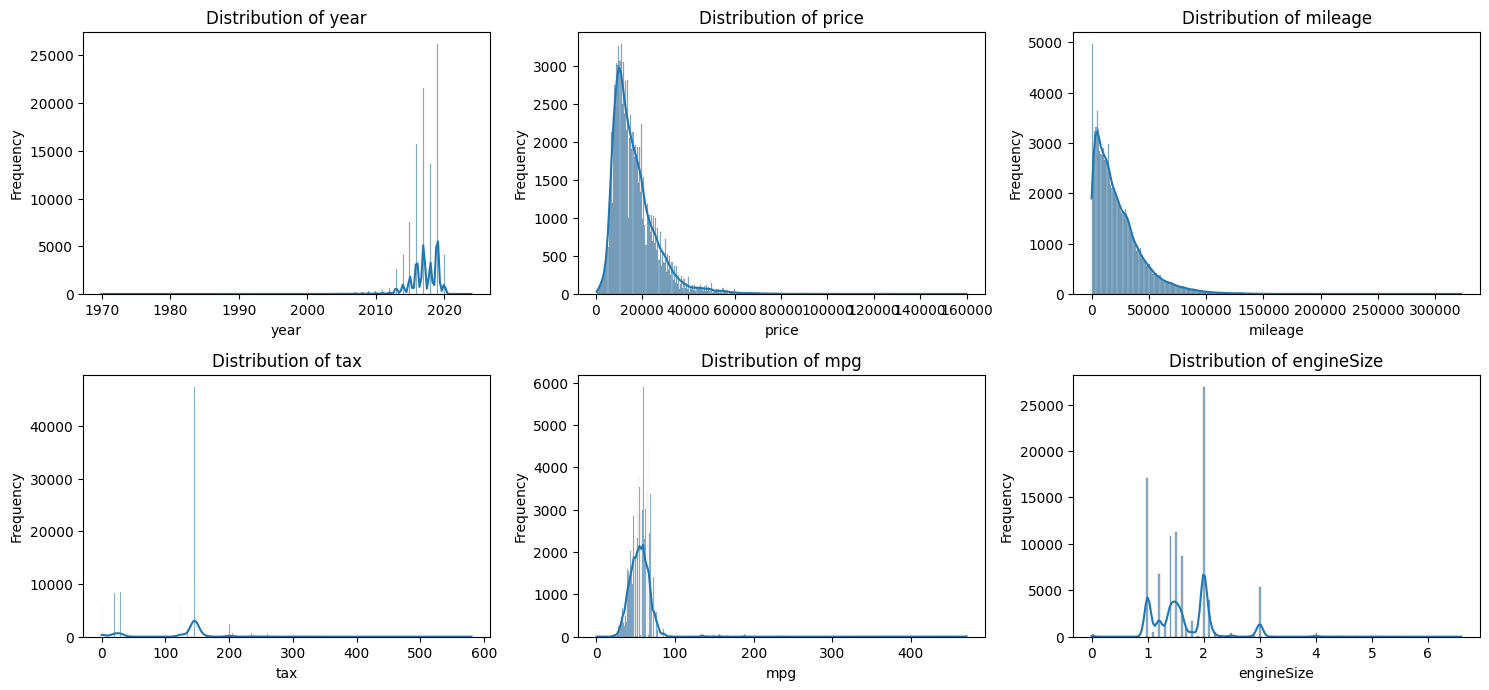

In [265]:
# Distribution of Numerical Columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

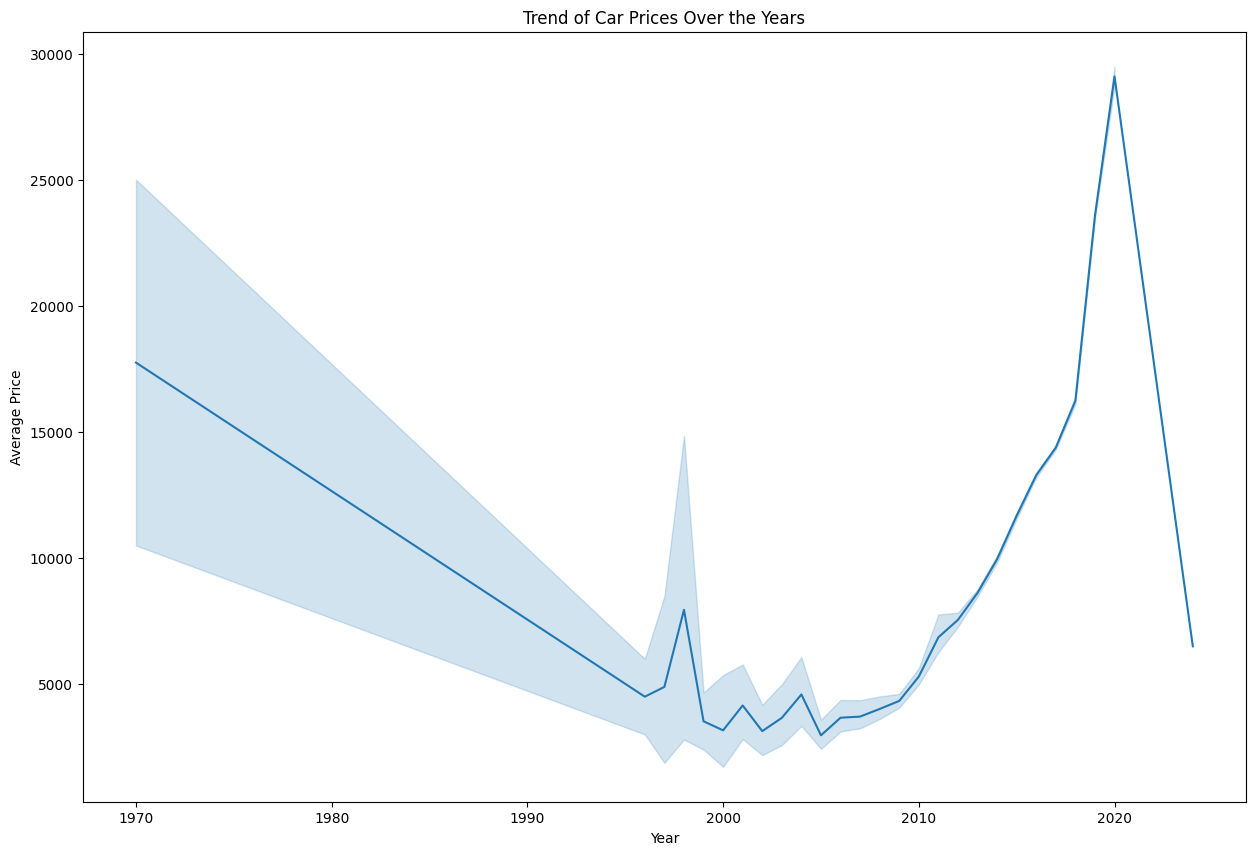

In [266]:
# Trend of Car Prices Over the Years
plt.figure(figsize=(15, 10))
sns.lineplot(data=df, x='year', y='price', estimator='mean')
plt.title('Trend of Car Prices Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()

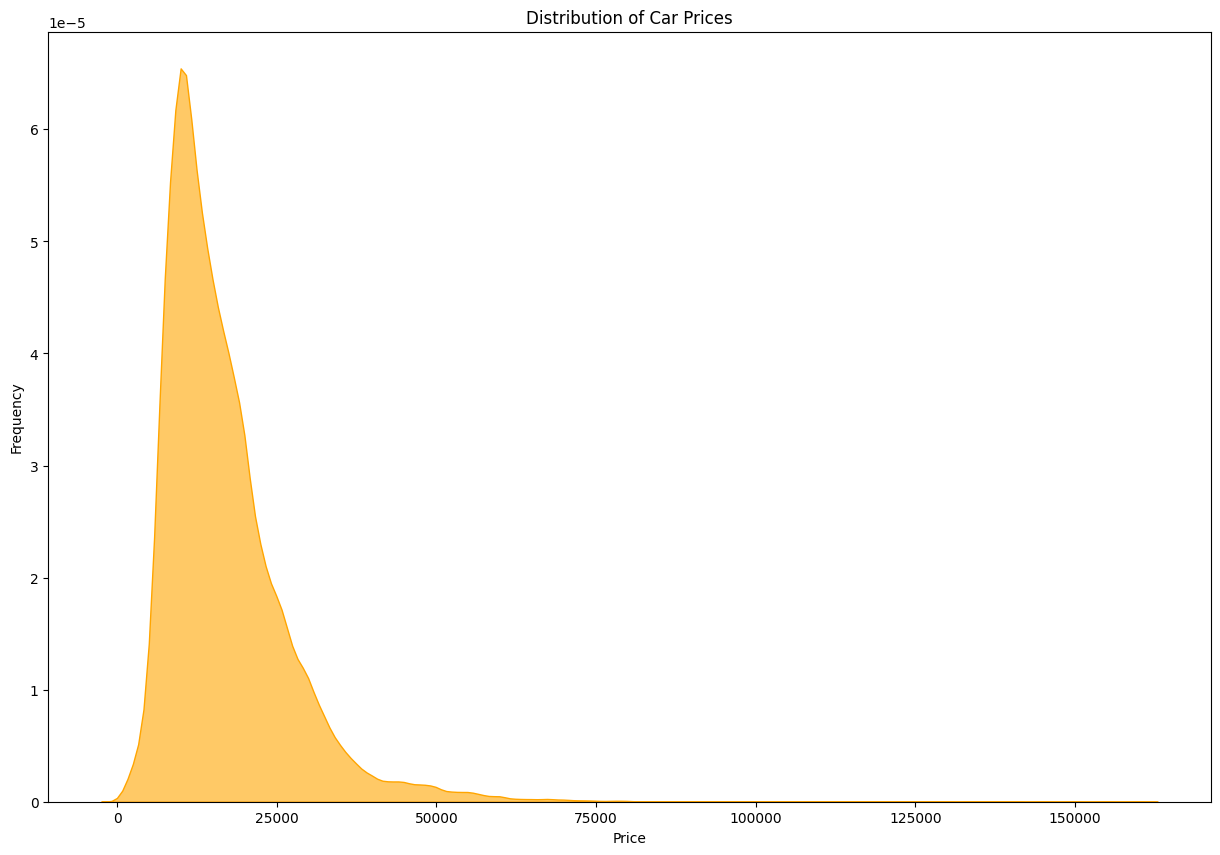

In [267]:
# Distribution of Car Prices
plt.figure(figsize=(15, 10))
sns.kdeplot(data=df, x='price', fill=True, color='orange', alpha=0.6)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

C:\Users\panta\AppData\Local\Temp\ipykernel_14600\1373236360.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Manufacturer', y='price', palette='muted')


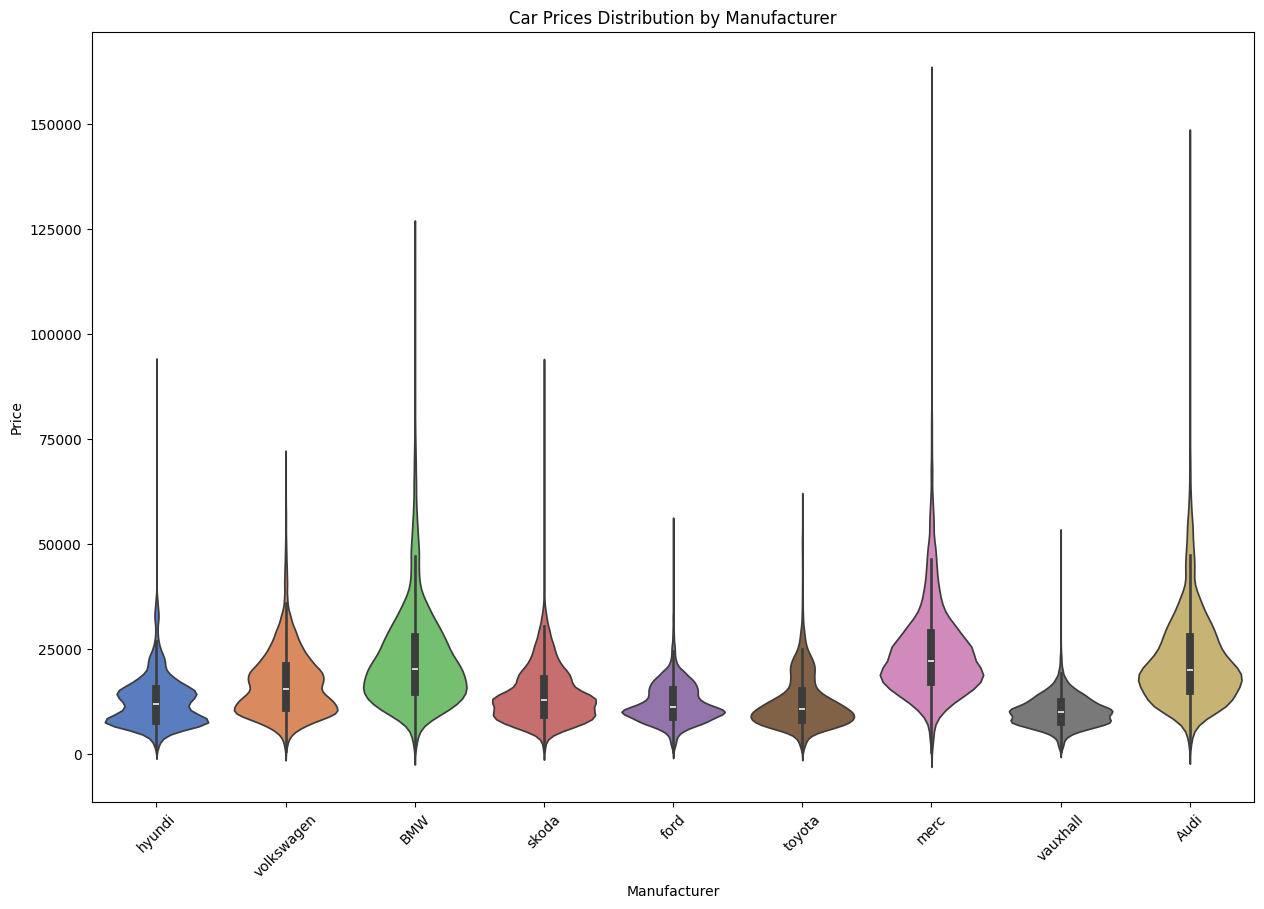

In [268]:
# Car Prices Distribution by Manufacturer
plt.figure(figsize=(15, 10))
sns.violinplot(data=df, x='Manufacturer', y='price', palette='muted')
plt.title('Car Prices Distribution by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

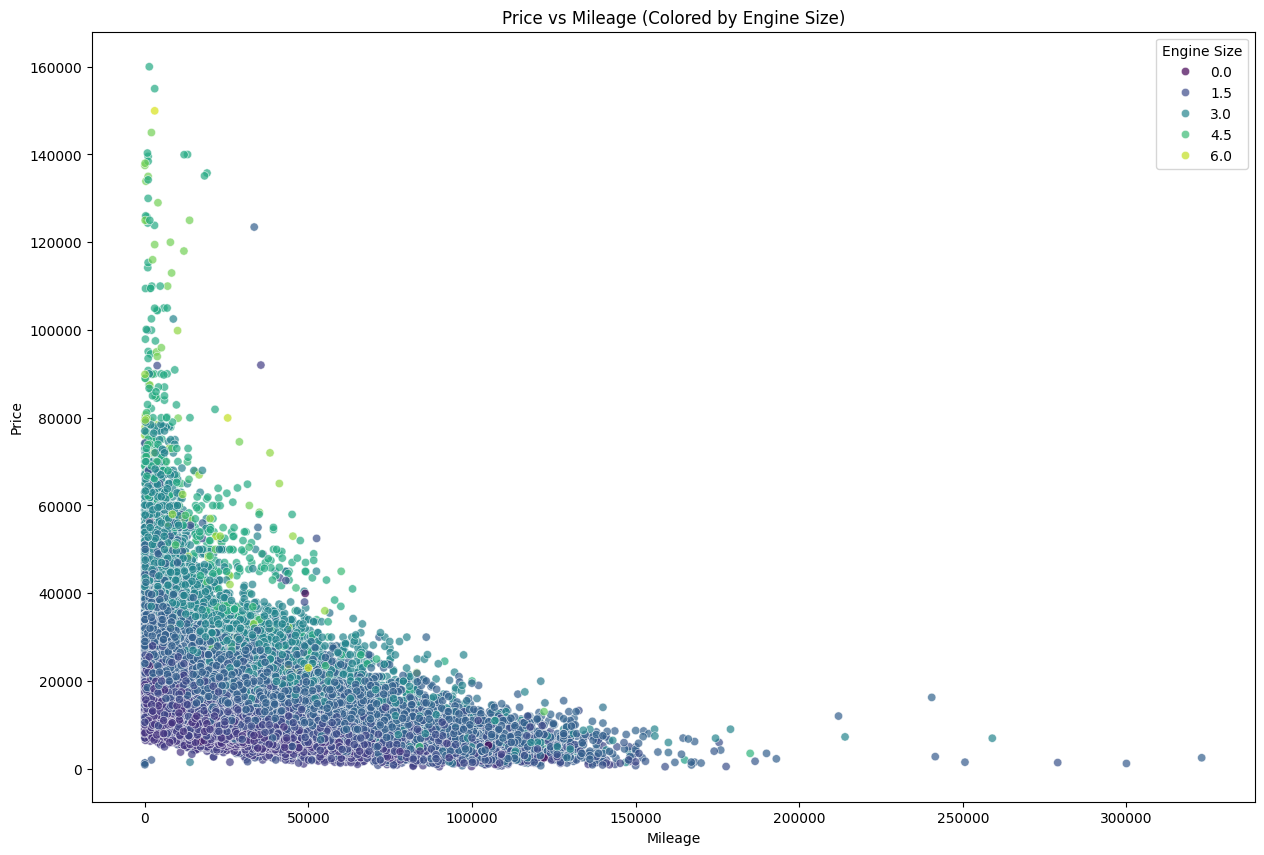

In [269]:
# Price vs Mileage (Colored by Engine Size)
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, x='mileage', y='price', hue=df['engineSize'], palette='viridis', alpha=0.7)
plt.title('Price vs Mileage (Colored by Engine Size)')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.legend(title='Engine Size')
plt.show()

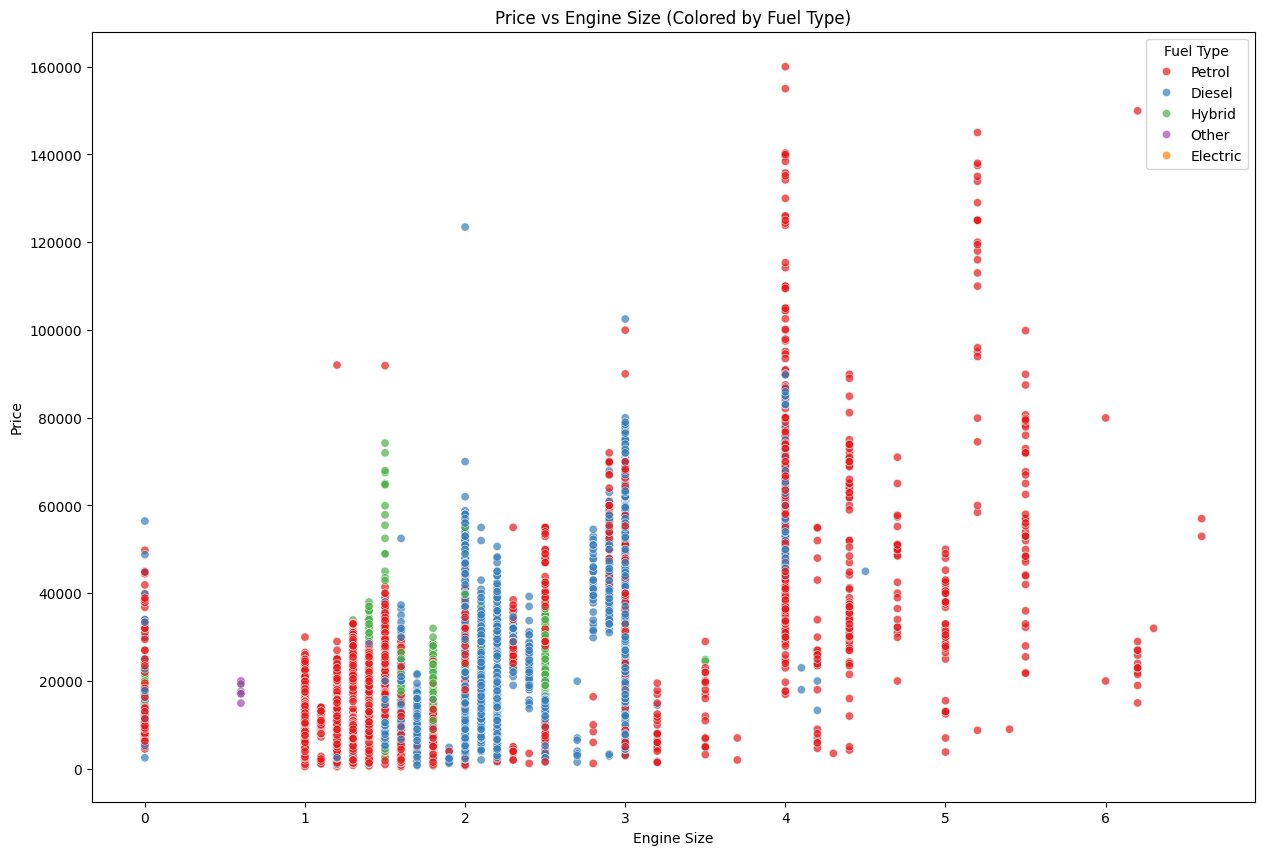

In [270]:
# Price vs Engine Size (Colored by Fuel Type)
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, x='engineSize', y='price', hue=df['fuelType'], palette='Set1', alpha=0.7)
plt.title('Price vs Engine Size (Colored by Fuel Type)')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.legend(title='Fuel Type')
plt.show()

### Data Cleaning
This section includes handling missing values, duplicates, and outliers.

In [271]:
print("Data size: ", df.shape)

print("Data columns: ", df.columns)

print("Data types: ", df.dtypes)


Data size:  (97712, 10)
Data columns:  Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'Manufacturer'],
      dtype='object')
Data types:  model            object
year              int64
price           float64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
Manufacturer     object
dtype: object


In [272]:
# Null and NaN values
print("Null values: ", df.isnull().sum())

print("=== === === === === ===")
# Unique values in each column
print("Unique values: ", df.nunique())

print("=== === === === === ===")
# Check for duplicates
duplicates = df.duplicated().sum()
print("Duplicates: ", duplicates)

Null values:  model              0
year               0
price            985
transmission       0
mileage            0
fuelType        4126
tax                0
mpg             3456
engineSize         0
Manufacturer       0
dtype: int64
=== === === === === ===
Unique values:  model             196
year               27
price           13156
transmission        4
mileage         42214
fuelType            5
tax                48
mpg               204
engineSize         40
Manufacturer        9
dtype: int64
=== === === === === ===
Duplicates:  1


In [273]:
# Dealing with Null and NaN values
# Dropna Price
df.dropna(subset=['price'], inplace=True)
 
# Fillin the missing values in 'FuelType' column with the mode of the respective 'Model'
df['fuelType'] = df.groupby('model')['fuelType'].transform(lambda x: x.fillna(x.mode()[0]))

# Filling the missing mpg values with the mean of the respective 'engineSize' and 'fuelType'
df['mpg'] = df.groupby(['engineSize', 'fuelType'])['mpg'].transform(lambda x: x.fillna(x.mean()))

In [274]:
df.isnull().sum()


model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
Manufacturer    0
dtype: int64

In [275]:
# Dealing with duplicates
df.drop_duplicates(inplace=True)
duplicates_after = df.duplicated().sum()
print("Duplicates after removal: ", duplicates_after)

Duplicates after removal:  0


In [276]:
# Find and treat outliers in the 'price' column using Z-score method
from scipy import stats
# Calculate Z-scores for the 'price' column
z_scores = stats.zscore(df['price'])
print("Shape before removing outliers: ", df.shape)
# Define a threshold for identifying outliers
threshold = 3
# Identify outliers based on Z-scores
outliers_z = np.where(np.abs(z_scores) > threshold)[0]
# Remove outliers from the DataFrame
df = df.drop(df.index[outliers_z])
# Reset the index after removing outliers
df.reset_index(drop=True, inplace=True)
# Check the shape of the DataFrame after removing outliers
print("Shape after removing outliers: ", df.shape)

Shape before removing outliers:  (96727, 10)
Shape after removing outliers:  (94995, 10)


In [277]:
# Check the distribution of the 'engineSize' column
df['engineSize'].value_counts()

engineSize
2.0    26443
1.0    16945
1.5    11111
1.4    10774
1.6     8604
1.2     6644
3.0     4297
2.1     3942
1.8     1696
1.3     1290
1.7      897
1.1      550
2.2      459
2.5      432
0.0      259
2.3      143
4.0       86
2.9       78
2.4       71
5.0       48
4.4       45
2.8       30
1.9       27
3.2       26
4.2       21
3.5       20
6.2       12
5.5       10
4.7       10
2.7        8
0.6        7
3.7        2
4.1        2
5.4        1
4.5        1
4.3        1
6.3        1
5.2        1
6.0        1
Name: count, dtype: int64

In [278]:
# Check the distribution of the 'fuelType' column
df[df['engineSize'] == 0.0]['fuelType'].value_counts()

fuelType
Petrol      152
Diesel       66
Hybrid       38
Electric      2
Other         1
Name: count, dtype: int64

In [279]:
# Remove rows with engineSize = 0.0 and fuelType = 'Electric' or 'Other'
df = df[df['engineSize'] != 0.0]
df = df[~df['fuelType'].isin(['Electric', 'Other'])]

df[df['engineSize'] == 0.0]['fuelType'].value_counts()

print("Shape after filtering: ", df.shape)

Shape after filtering:  (94495, 10)


In [280]:
# Save the cleaned DataFrame to a new CSV file
df.to_csv("cars-data/cleaned_cars_data.csv", index=False)

### Data Preprocessing
This section includes label encoding for categorical columns and splitting the dataset into training and testing sets.


In [ ]:
# Label encoding for all categorical columns
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['model', 'transmission', 'fuelType', 'Manufacturer']
le = LabelEncoder()

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

['label_encoders.pkl']

In [293]:
X = df.drop(columns=['price'])
y = df['price']

print("X shape: ", X.shape)
print("y shape: ", y.shape)
print("X columns: ", X.columns)
print("y columns: ", y.name)

X shape:  (94495, 9)
y shape:  (94495,)
X columns:  Index(['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize', 'Manufacturer'],
      dtype='object')
y columns:  price


In [294]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (75596, 9)
X_test shape:  (18899, 9)
y_train shape:  (75596,)
y_test shape:  (18899,)


### Feature Importance and Selection
This section includes feature selection using mutual information regression.

Mutual Information Scores:
        Feature  MI Score
0         model  0.707264
6           mpg  0.360374
7    engineSize  0.349091
1          year  0.318478
8  Manufacturer  0.307578
2  transmission  0.232205
3       mileage  0.216647
5           tax  0.200800
4      fuelType  0.070423


C:\Users\panta\AppData\Local\Temp\ipykernel_14600\746441854.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="MI Score", y="Feature", data=mi_df, palette="viridis")


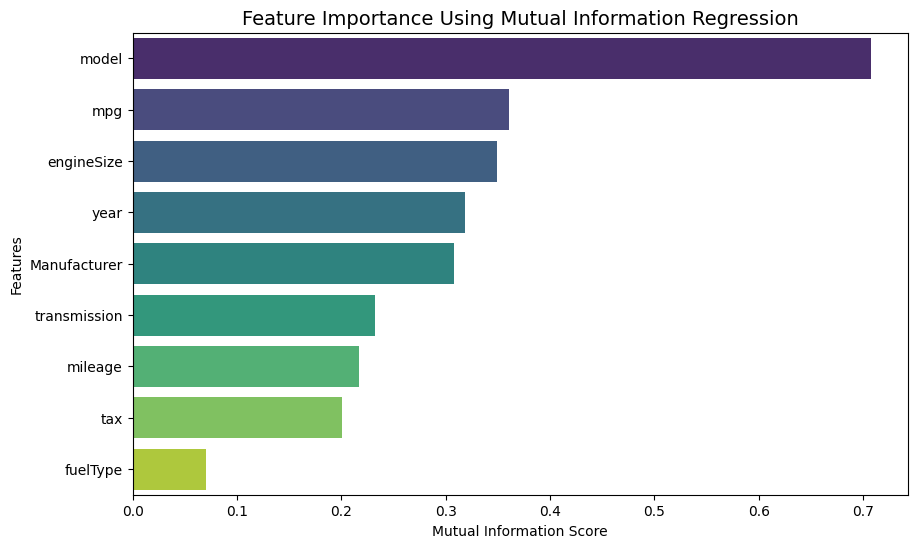

In [295]:
# Feature Selection using mutual information regression
from sklearn.feature_selection import mutual_info_regression
mi_scores = mutual_info_regression(X_train, y_train)

mi_df = pd.DataFrame({'Feature': X_train.columns, 'MI Score': mi_scores})

mi_df = mi_df.sort_values(by="MI Score", ascending=False)

print("Mutual Information Scores:")
print(mi_df)

plt.figure(figsize=(10,6))
sns.barplot(x="MI Score", y="Feature", data=mi_df, palette="viridis")
plt.title("Feature Importance Using Mutual Information Regression", fontsize=14)
plt.xlabel("Mutual Information Score")
plt.ylabel("Features")
plt.show()

### Model Training and Evaluation
This section includes training and evaluating different models such as Random Forest, LightGBM, and Linear Regression.

In [296]:
# Initializing the model
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import time

# Initialize the models
rf_model = RandomForestRegressor(random_state=42)
lgbm_model = LGBMRegressor(random_state=42)
lin_model = LinearRegression()

models = {
    'Random Forest': rf_model,
    'LightGBM': lgbm_model,
    'Linear Regression': lin_model
}

results = {}



**LightGBM**:  
Chosen for its speed and efficiency with large datasets (94k samples), native handling of categorical features (critical for high-cardinality columns like `model` and `Manufacturer`), and ability to model non-linear relationships (aligned with high mutual information scores for `model`, `year`, and `engineSize`).  

**Random Forest**:  
Selected for robustness to outliers (e.g., extreme `mileage` values), inherent feature importance calculation (validating mutual information results like `model` and `mpg` dominance), and ease of training with mixed data types without extensive preprocessing.  

**Linear Regression**:  
Used as a baseline for interpretability, revealing linear relationships (e.g., how `year` or `engineSize` linearly impacts price), and to contrast with tree-based models when non-linearities/interactions (e.g., `year*mileage`) dominate, as hinted by mutual information rankings.

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000789 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 720
[LightGBM] [Info] Number of data points in the train set: 75596, number of used features: 9
[LightGBM] [Info] Start training from score 16014.938462

Model Performance Comparison:
            Model  Train RMSE   Test RMSE  Train R2  Test R2   Train MAE    Test MAE  Training Time
    Random Forest  639.482931 1607.295797  0.993600 0.959632  418.125838 1085.867964      23.637676
         LightGBM 1823.283160 1853.166230  0.947976 0.946337 1291.804506 1313.753451       0.247582
Linear Regression 4102.056768 4092.851738  0.736672 0.738241 3078.353703 3055.081100       0.081639


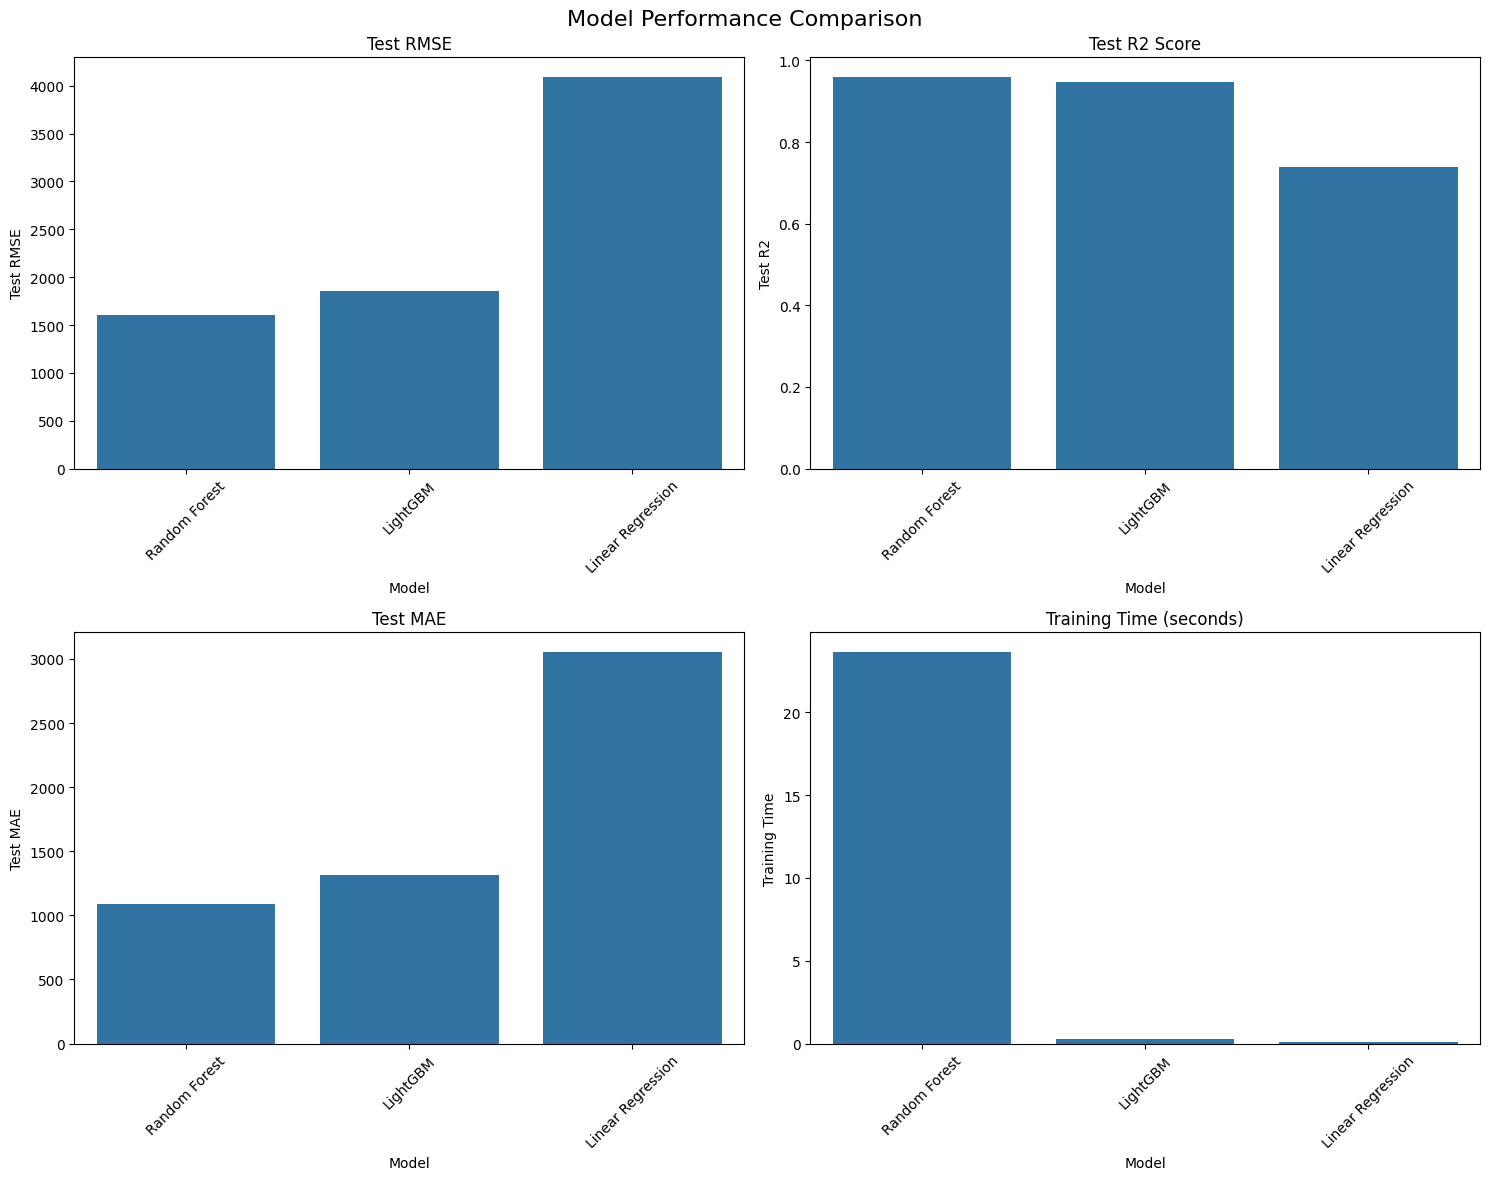

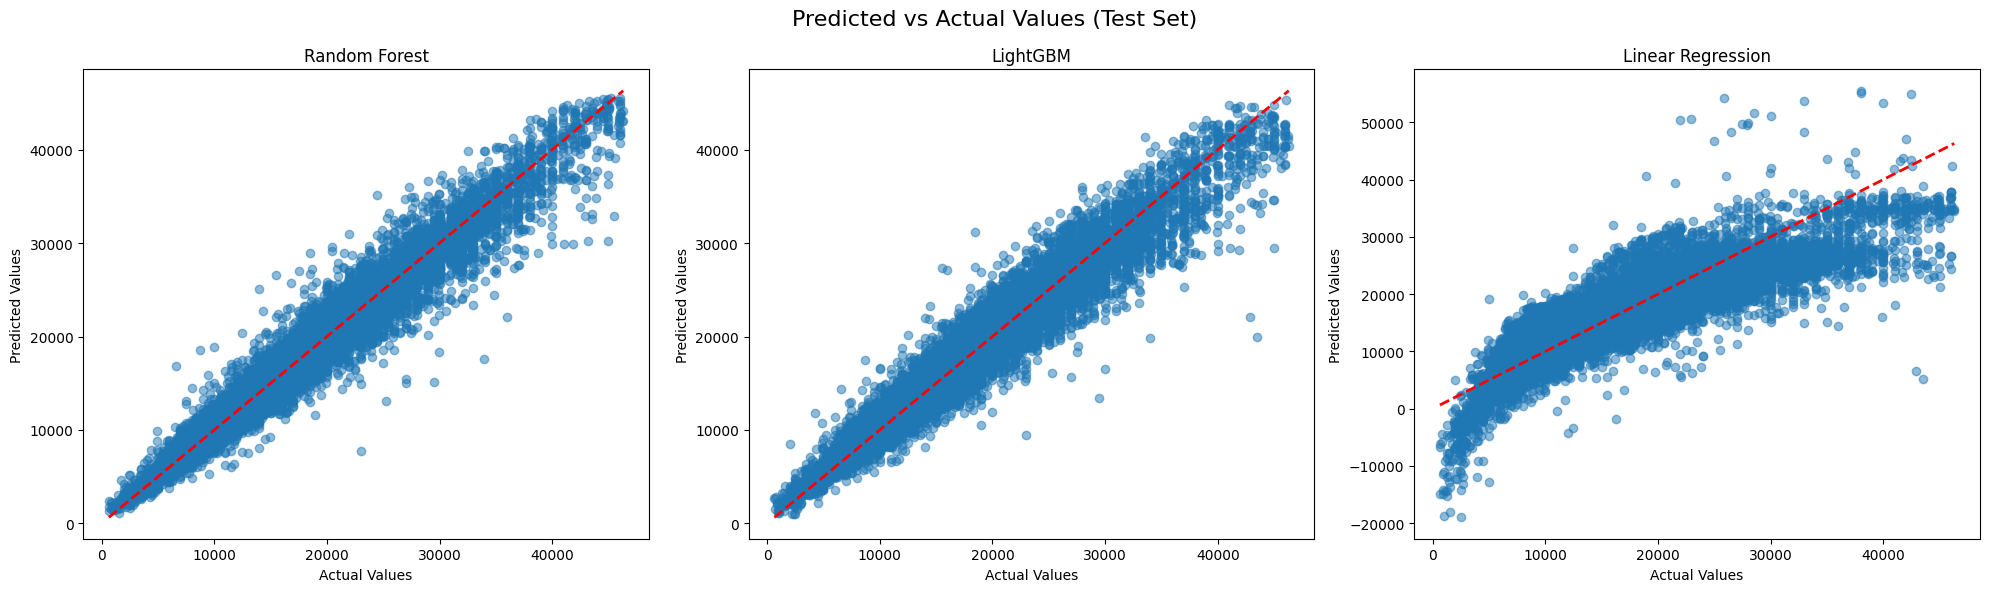

In [297]:
# Train and evaluate each model with more metrics

results = {
    'Model': [],
    'Train RMSE': [],
    'Test RMSE': [],
    'Train R2': [],
    'Test R2': [],
    'Train MAE': [],
    'Test MAE': [],
    'Training Time': []
}

for name, model in models.items():
    # Training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    results['Model'].append(name)
    results['Train RMSE'].append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    results['Test RMSE'].append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
    results['Train R2'].append(r2_score(y_train, y_train_pred))
    results['Test R2'].append(r2_score(y_test, y_test_pred))
    results['Train MAE'].append(mean_absolute_error(y_train, y_train_pred))
    results['Test MAE'].append(mean_absolute_error(y_test, y_test_pred))
    results['Training Time'].append(training_time)

# Create DataFrame with results
results_df = pd.DataFrame(results)
print("\nModel Performance Comparison:")
print(results_df.to_string(index=False))

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Model Performance Comparison', fontsize=16)

# RMSE Plot
sns.barplot(data=results_df, x='Model', y='Test RMSE', ax=axes[0,0])
axes[0,0].set_title('Test RMSE')
axes[0,0].tick_params(axis='x', rotation=45)

# R2 Plot
sns.barplot(data=results_df, x='Model', y='Test R2', ax=axes[0,1])
axes[0,1].set_title('Test R2 Score')
axes[0,1].tick_params(axis='x', rotation=45)

# MAE Plot
sns.barplot(data=results_df, x='Model', y='Test MAE', ax=axes[1,0])
axes[1,0].set_title('Test MAE')
axes[1,0].tick_params(axis='x', rotation=45)

# Training Time Plot
sns.barplot(data=results_df, x='Model', y='Training Time', ax=axes[1,1])
axes[1,1].set_title('Training Time (seconds)')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Scatter plots of predicted vs actual values for test set
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Predicted vs Actual Values (Test Set)', fontsize=16)

for idx, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    axes[idx].scatter(y_test, y_pred, alpha=0.5)
    axes[idx].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[idx].set_title(name)
    axes[idx].set_xlabel('Actual Values')
    axes[idx].set_ylabel('Predicted Values')

plt.tight_layout()
plt.show()


**1. Random Forest**  
- **Overfitting**: Severe.  
  - Train RMSE (639) vs. Test RMSE (1607): **Huge gap** indicates memorization of training data.  
  - Train R² (0.99) vs. Test R² (0.96): Perfect training performance but degraded generalization.  
- **Why It’s Problematic**: While it has the "best" test metrics, the extreme overfitting makes it unreliable for new data.  

---

**2. LightGBM**  
- **Generalization**: Best.  
  - Train RMSE (1823) vs. Test RMSE (1853): **Smallest gap** suggests balanced learning.  
  - Consistent R² (~0.94-0.95): No significant overfitting.  
- **Why It’s Better**: Robust to overfitting, fast training (0.2s), and reasonable error margins. Ideal for deployment.  

---

**3. Linear Regression**  
- **Underfitting**: Clear.  
  - Poor performance across all metrics (Test R² = 0.74, Test MAE = 3055).  
  - Train/test scores are nearly identical: Model is too simple to capture patterns.  
- **Why It’s Worse**: Fails to model non-linear relationships (critical for car pricing).  


### Hyperparameter Tuning
This section includes hyperparameter tuning for the LightGBM model using RandomizedSearchCV.

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007636 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 720
[LightGBM] [Info] Number of data points in the train set: 75596, number of used features: 9
[LightGBM] [Info] Start training from score 16014.938462
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

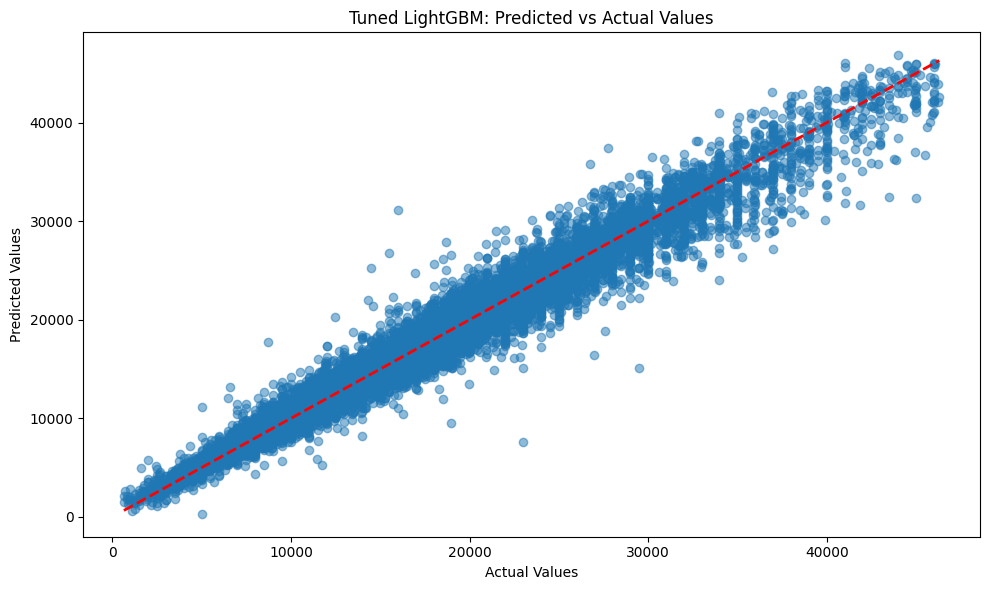

In [298]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Hypertuning the LightGBM model using RandomizedSearchCV
# Define parameter grid for LightGBM
param_dist = {
    'n_estimators': randint(100, 1000),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 15),
    'num_leaves': randint(20, 100),
    'min_child_samples': randint(10, 50),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
}

# Initialize LightGBM model
lgb_tuned = LGBMRegressor(random_state=42)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    lgb_tuned, 
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Fit the model
random_search.fit(X_train, y_train)

# Get best parameters
print("\nBest parameters:", random_search.best_params_)

# Make predictions
y_train_pred = random_search.predict(X_train)
y_test_pred = random_search.predict(X_test)

# Calculate metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Add results to the comparison table
results['Model'].append('LightGBM (Tuned)')
results['Train RMSE'].append(train_rmse)
results['Test RMSE'].append(test_rmse)
results['Train R2'].append(train_r2)
results['Test R2'].append(test_r2)
results['Train MAE'].append(train_mae)
results['Test MAE'].append(test_mae)
results['Training Time'].append(time.time() - start_time)

# Update results DataFrame
results_df = pd.DataFrame(results)
print("\nUpdated Model Performance Comparison:")
print(results_df.to_string(index=False))

# Visualization of predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Tuned LightGBM: Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.tight_layout()
plt.show()

Here’s the analysis of whether tuning improved **LightGBM** and the overall best model:  
**1. LightGBM (Tuned) vs. Original LightGBM**  
- **Improvement**: Yes!  
  - **Test RMSE**: Dropped from **1853 → 1471** (↓ ~20%).  
  - **Test R²**: Increased from **0.946 → 0.966** (more variance explained).  
  - **Test MAE**: Reduced from **1313 → 1011** (↓ ~23%).  
- **Trade-off**: Training time increased significantly (0.2s → 723s) due to hyperparameter tuning, but the performance gains justify it.  

---

**2. LightGBM (Tuned) vs. Random Forest**  
- **Generalization**: LightGBM (Tuned) is now **better** than Random Forest.  
  - **Test RMSE**: **1471** (LightGBM) vs. **1607** (Random Forest).  
  - **Test R²**: **0.966** (LightGBM) vs. **0.959** (Random Forest).  
  - **Overfitting**: Random Forest’s Train-Test gap is catastrophic (RMSE: 639 vs. 1607), while LightGBM (Tuned) maintains a reasonable gap (1171 vs. 1471).  

---

**3. Final Verdict**  
- **Best Model**: **LightGBM (Tuned)** – It now outperforms all others in generalization *and* absolute error.  
- **Why**:  
  1. Highest Test R² (0.966) and lowest Test RMSE/MAE.  
  2. Less overfitting than Random Forest.  
  3. Still far better than Linear Regression (which underfits).  
- **Caveat**: The tuned model’s training time is high, but this is acceptable for production if prediction latency is low.  


### Model Saving and Loading
This section includes saving the best model and loading it for testing.

In [299]:
# save the best model : LightGBM tuned
import joblib

# Save the model to a file
joblib.dump(random_search, 'best_model.pkl')

['best_model.pkl']

### Load the model for testing

In [310]:
import pandas as pd
import joblib
import json
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

# Load model
model = joblib.load('best_model.pkl')

# Load data for prediction
df_original = pd.read_csv("cars-data/cleaned_cars_data.csv")
pf_actual_price = df_original['price'].values

# Prepare prediction data
df_to_predict = df_original.drop(columns=['price']).copy()

# Define categorical columns
categorical_columns = ['model', 'transmission', 'fuelType', 'Manufacturer']

# Initialize LabelEncoders for each categorical column
encoders = {col: LabelEncoder() for col in categorical_columns}

# Fit and transform the training data
for col in categorical_columns:
    if col in df_to_predict.columns:
        df_to_predict[col] = encoders[col].fit_transform(df_to_predict[col])
    else:
        print(f"Column {col} not found in the dataset. Skipping encoding.")

# Check for missing values in categorical columns
for col in categorical_columns:
    if df_to_predict[col].isnull().sum() > 0:
        print(f"Missing values found in {col}. Filling with a default value.")
        df_to_predict[col].fillna('Unknown', inplace=True)

# Make predictions
predictions = model.predict(df_to_predict)

# Create results DataFrame
df_predicted_price = pd.DataFrame({
    'predicted_price': predictions,
    'actual_price': pf_actual_price
}).dropna()

# Calculate metrics
tolerance = 0.15  # Increased tolerance to 15%
within_tolerance = abs(df_predicted_price['predicted_price'] - df_predicted_price['actual_price']) <= (df_predicted_price['actual_price'] * tolerance)
correctness_percentage = (within_tolerance.sum() / len(df_predicted_price)) * 100
squared_mse = mean_squared_error(df_predicted_price['actual_price'], df_predicted_price['predicted_price'])
rmse = squared_mse ** 0.5

print(f"Prediction Accuracy (15% tolerance): {correctness_percentage:.2f}%")
print(f"RMSE: £{rmse:.2f}")

# Save sample predictions
df_combined = pd.concat([df_to_predict, df_predicted_price], axis=1)
random_predictions = df_combined.sample(n=30, random_state=42).to_dict(orient='records')
with open('cars-data/random_predictions.json', 'w') as f:
    json.dump(random_predictions, f, indent=4)

print("Sample predictions saved to cars-data/random_predictions.json")

Prediction Accuracy (15% tolerance): 94.42%
RMSE: £1237.72
Sample predictions saved to cars-data/random_predictions.json
